# Map of sub-domain of ANHA12

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import stations
import seaborn as sns
import csv
import matplotlib.image as mpimg

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
sns.set(rc={'axes.facecolor':'none', 'figure.facecolor':'white'})

### Load relevant data:

Land mask

In [3]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

Bathymetry:

In [4]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [5]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [6]:
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

CAA station locations:

In [7]:
features = ['Beaufort Sea', 'Arctic Ocean', 'Kalaallit Nunaat','(Greenland)', 'Nunavut', \
           'Northwest','Territories']

### Create plots

In [8]:
plt.rcParams['font.family'] = 'arial'

Show sub-domain in detail with the grid:

In [9]:
lon_features1 = [-149.5, -118, -48, -47, -112, -133, -131]
lat_features1 = [74.5, 88.5 , 74.5, 72.5, 65, 65, 64.5]

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: Matplo

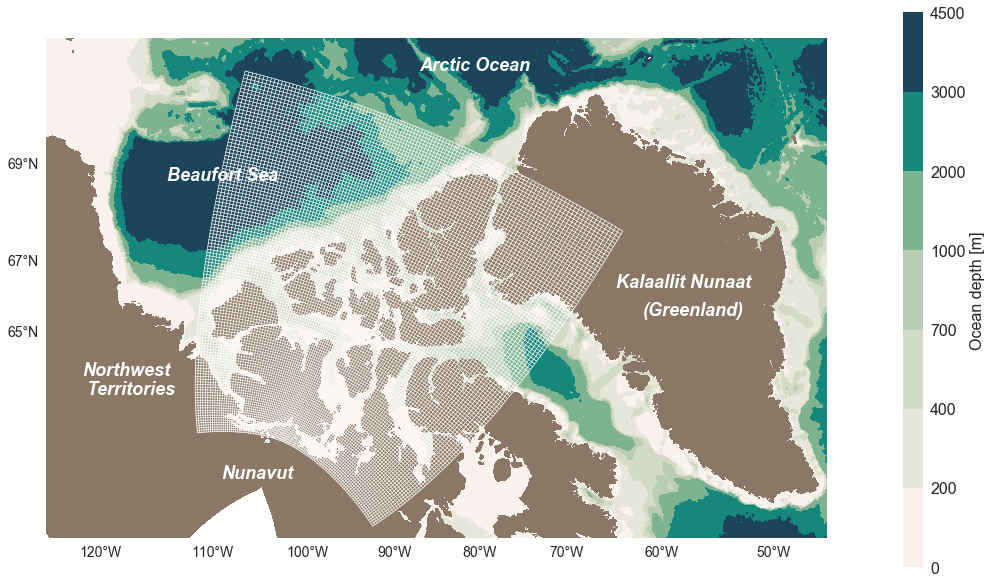

In [10]:
fig,ax = plt.subplots(figsize=(14,11))

proj=Basemap(projection='eqdc',lat_0 = 77.5, lon_0 = -85, resolution='i', width=4.5e6, height=2.88e6)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

# bathymetry:
clevels=[0, 200, 400, 700, 1000, 2000, 3000, 4500]
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,clevels, cmap=cmocean.cm.tempo)

# apply land mask:
x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmap1)

x=x_mesh
y=y_mesh
res=5
# sub-domain:
# Northern (model Eastern) boundary
proj.plot(x[1480:2050:res,200:799:res], y[1480:2050:res,200:799:res], 'w-', lw=0.7)
proj.plot(x[1480:2050:res,200:799:res].T, y[1480:2050:res,200:799:res].T, 'w-', lw=0.7)

# features:
textx, texty = proj(lon_features1, lat_features1)
for i in range(len(features)):
    plt.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w')

#---------------------
    
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)
# fig.savefig('CAA_sub-domain_grid.png', bbox_inches='tight')

Show sub-domain as part of larger ANHA12 domain:

In [11]:
lon_features2 = [-150, -125, -55, -52, -108]
lat_features2 = [74, 86, 72.5, 70.5, 66]

In [ ]:
fig,ax = plt.subplots(figsize=(11,10))

proj = Basemap(width=26.0e6, height=18.68e6, projection='stere',\
            lat_ts=85,lat_0=50,lon_0=-35)
proj.drawcoastlines(linestyle='-', color='k', linewidth=0.7, zorder=3)

# bathymetry: full-domain
clevels = [0, 500, 1000, 1200,1600, \
           2000, 2500, 3000, 3500, 4000, 6000]
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, cmap=cmocean.cm.tempo)

# apply land mask:
x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmap1)
    
x = x_mesh
y = y_mesh
d = 10

# sub-domain:
# Northern (model Eastern) boundary
proj.plot(x[1480:2050,799], y[1480:2050,799], 'r-', lw=1.3)
proj.plot(x[1480:2050,799].T, y[1480:2050,799].T, 'r-', lw=1.3)
# # Southern (model Western) boundary
proj.plot(x[1480:2050,200], y[1480:2050,200], 'r-', lw=1.3)
proj.plot(x[1480:2050,200].T, y[1480:2050,200].T, 'r-', lw=1.3)
# Eastern (model Southern) boundary
proj.plot(x[1480,200:799], y[1480,200:799], 'r-', lw=1.3)
proj.plot(x[1480,200:799].T, y[1480,200:799].T, 'r-', lw=1.3)
# Western (model Northern) boundary
proj.plot(x[2050,200:799], y[2050,200:799], 'r-', lw=1.3)
proj.plot(x[2050,200:799].T, y[2050,200:799].T, 'r-', lw=1.3)

# CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
# a = CBar.set_label('Ocean depth [m]', fontsize=16)
# CBar.ax.tick_params(axis='y', length=0, labelsize=16)
# fig.savefig('CAA_sub-domain.png', bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(figsize=(11,10))

proj = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='l')
proj.drawmapboundary(fill_color='white')
proj.drawparallels(np.arange(-90.,120.,30.))
proj.drawmeridians(np.arange(0.,420.,60.))
proj.drawlsmask(land_color = "#8b7765", ocean_color="#ffffff", resolution = 'l')

# bathymetry: full-domain
clevels = [0, 500, 1000, 1200,1600, \
           2000, 2500, 3000, 3500, 4000, 6000]
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, cmap=cmocean.cm.tempo)

# apply land mask:
x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmap1)
    
x = x_mesh
y = y_mesh

# full domain:
proj.plot(x[:,0]         , y[:,0]        , 'r--', lw=1.3)
proj.plot(x[:,0].T       , y[:,0].T      , 'r--', lw=1.3)
proj.plot(x[200:-1,-1]   , y[200:-1,-1]  , 'r--', lw=1.3)
proj.plot(x[200:-1,-1].T , y[200:-1,-1].T, 'r--', lw=1.3)
proj.plot(x[-1,:]        , y[-1,:]       , 'r--', lw=1.3)
proj.plot(x[-1,:].T      , y[-1,:].T     , 'r--', lw=1.3)
proj.plot(x[0,0:-200]    , y[0,0:-200]   , 'r--', lw=1.3)
proj.plot(x[0,0:-200].T  , y[0,0:-200].T , 'r--', lw=1.3)

# sub-domain:
proj.plot(x[1480:2050,799],   y[1480:2050,799],   'r-', lw=1.3)
proj.plot(x[1480:2050,799].T, y[1480:2050,799].T, 'r-', lw=1.3)
proj.plot(x[1480:2050,200],   y[1480:2050,200],   'r-', lw=1.3)
proj.plot(x[1480:2050,200].T, y[1480:2050,200].T, 'r-', lw=1.3)
proj.plot(x[1480,200:799],    y[1480,200:799],    'r-', lw=1.3)
proj.plot(x[1480,200:799].T,  y[1480,200:799].T,  'r-', lw=1.3)
proj.plot(x[2050,200:799],    y[2050,200:799],    'r-', lw=1.3)
proj.plot(x[2050,200:799].T,  y[2050,200:799].T,  'r-', lw=1.3)

Combine both figures:

In [12]:
nv = mpimg.imread('./nunavut.png')
nwt = mpimg.imread('./NWT.png')

In [13]:
# features = ['Beaufort Sea', 'Arctic Ocean', 'Kalaallit Nunaat','Greenland', 'Nunavut', \
#            'Northwest','Territories']
# lon_features1 = [-149.5, -118, -48, -47, -106, \
#                  -130.9, -129.4]
# lat_features1 = [74.5, 88.5 , 74.5, 72.5, 63.8, \
#                  64.8, 62.2]
features = ['Arctic Ocean', 'Kalaallit Nunaat','Greenland', \
           'Northwest','Territories', 'Nunavut', 'Beaufort Sea']
lon_features1 = [-139, -48, -47, \
                -132.5, -131.3, -105.5, -149.5]
lat_features1 = [88, 74.5, 73.1, \
                64.1, 63.4, 64, 74.5]

/home/brogalla/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4979: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: Matplo

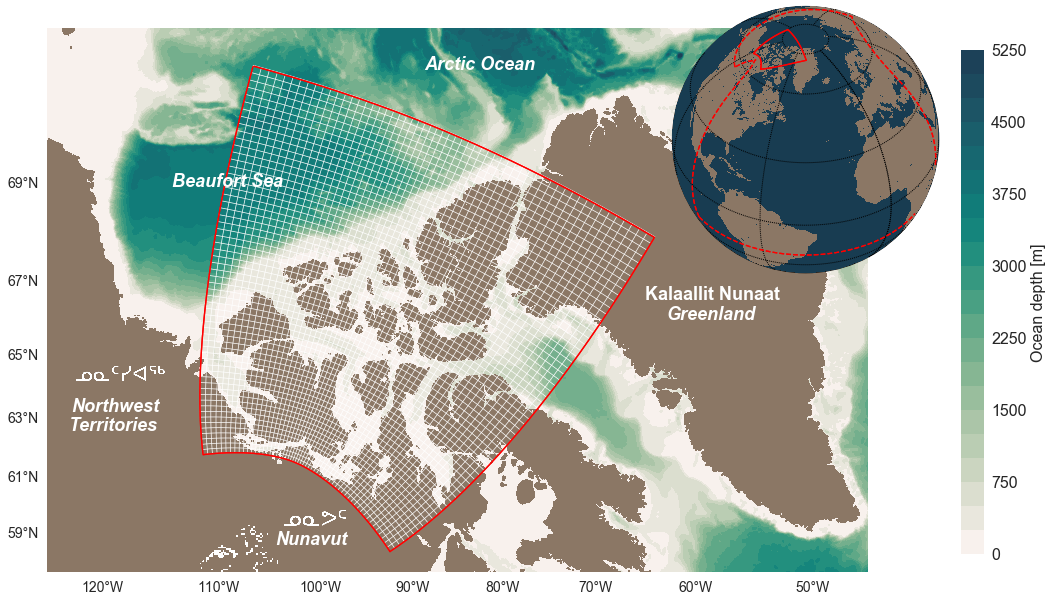

In [20]:
fig, ax1 = plt.subplots(figsize=(16,10))
left, bottom, width, height = [0.63, 0.54, 0.37, 0.37]
ax2 = fig.add_axes([left, bottom, width, height])

# plot 1 --------------------
proj = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj.drawmapboundary(fill_color='white')
proj.drawparallels(np.arange(-90.,120.,30.),zorder=5)
proj.drawmeridians(np.arange(0.,420.,60.),zorder=5)
# proj.drawlsmask(land_color = "none", ocean_color="#183C51", resolution = 'h',zorder=1) #105A68 #0F4F5B #0E4954
proj.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=1) #105A68 #0F4F5B #0E4954

# # bathymetry: full-domain
# clevels = [0, 500, 1000, 1200,1600, \
#            2000, 2500, 3000, 3500, 4000, 6000]
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
# bath = proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, cmap=cmocean.cm.tempo,zorder=3)

# # apply land mask:
# x2, y2 = proj(mlons, mlats)
# z2 = Z_masked[0,:,:]
# cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
# proj.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmap1)
# proj.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h',zorder=4) 
    
x = x_mesh
y = y_mesh

# full domain:
proj.plot(x[:,0]         , y[:,0]        , 'r--', lw=1.3,zorder=5)
proj.plot(x[:,0].T       , y[:,0].T      , 'r--', lw=1.3,zorder=5)
proj.plot(x[200:-1,-1]   , y[200:-1,-1]  , 'r--', lw=1.3,zorder=5)
proj.plot(x[200:-1,-1].T , y[200:-1,-1].T, 'r--', lw=1.3,zorder=5)
proj.plot(x[-1,:]        , y[-1,:]       , 'r--', lw=1.3,zorder=5)
proj.plot(x[-1,:].T      , y[-1,:].T     , 'r--', lw=1.3,zorder=5)
proj.plot(x[0,0:-200]    , y[0,0:-200]   , 'r--', lw=1.3,zorder=5)
proj.plot(x[0,0:-200].T  , y[0,0:-200].T , 'r--', lw=1.3,zorder=5)

# sub-domain:
proj.plot(x[1480:2050,799],   y[1480:2050,799],   'r-', lw=1.3,zorder=5)
proj.plot(x[1480:2050,799].T, y[1480:2050,799].T, 'r-', lw=1.3,zorder=5)
proj.plot(x[1480:2050,200],   y[1480:2050,200],   'r-', lw=1.3,zorder=5)
proj.plot(x[1480:2050,200].T, y[1480:2050,200].T, 'r-', lw=1.3,zorder=5)
proj.plot(x[1480,200:799],    y[1480,200:799],    'r-', lw=1.3,zorder=5)
proj.plot(x[1480,200:799].T,  y[1480,200:799].T,  'r-', lw=1.3,zorder=5)
proj.plot(x[2050,200:799],    y[2050,200:799],    'r-', lw=1.3,zorder=5)
proj.plot(x[2050,200:799].T,  y[2050,200:799].T,  'r-', lw=1.3,zorder=5)

# plot 2: ---------------------------

proj2 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h')

# bathymetry:
# clevels2=[0, 200, 400, 600, 800, 1000, 2000, 3000, 4500]
clevels2=20
x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)
bath = proj2.contourf(x_mesh, y_mesh, mesh_bathy, clevels2, cmap=cmocean.cm.tempo, vmin=0, vmax=6000)

# apply land mask:
x2, y2 = proj2(mlons, mlats)
z2 = Z_masked[0,:,:]
cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj2.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmap1)

x=x_mesh
y=y_mesh
res=10
# sub-domain:
# Northern (model Eastern) boundary
proj2.plot(x[1480:2060:res,200:810:res], y[1480:2060:res,200:810:res], 'w-', lw=0.7)
proj2.plot(x[1480:2060:res,200:810:res].T, y[1480:2060:res,200:810:res].T, 'w-', lw=0.7)

# sub-domain:
proj2.plot(x[1480:2050,799]   , y[1480:2050,799]   , 'r-', lw=1.3)
proj2.plot(x[1480:2050,799].T , y[1480:2050,799].T , 'r-', lw=1.3)
proj2.plot(x[1480:2050,200]   , y[1480:2050,200]   , 'r-', lw=1.3)
proj2.plot(x[1480:2050,200].T , y[1480:2050,200].T , 'r-', lw=1.3)
proj2.plot(x[1480,200:799]    , y[1480,200:799]    , 'r-', lw=1.3)
proj2.plot(x[1480,200:799].T  , y[1480,200:799].T  , 'r-', lw=1.3)
proj2.plot(x[2050,200:799]    , y[2050,200:799]    , 'r-', lw=1.3)
proj2.plot(x[2050,200:799].T  , y[2050,200:799].T  , 'r-', lw=1.3)

# features:
textx, texty = proj2(lon_features1, lat_features1)
for i in range(len(features)):
    if features[i] == 'Kalaallit Nunaat':
        ax1.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', color='w')
    else:
        ax1.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w')
    
#nunavut:
ax3 = fig.add_axes([0.36, 0.18, 0.06, 0.04])
ax3.axis('off')
ax3.imshow(nv)
#northwest territories:
ax4 = fig.add_axes([0.17, 0.38, 0.10, 0.04])
ax4.axis('off')
ax4.imshow(nwt)

#---------------------
    
cbaxes = fig.add_axes([0.95, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax1, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)

fig.savefig('CAA_sub-domain_map-nobath2.png', bbox_inches='tight')

In [54]:
features = ['Arctic Ocean', 'Kalaallit Nunaat','Greenland', \
           'Northwest','Territories', 'Nunavut', 'Beaufort Sea']
lon_features1 = [-139, -48, -47, \
                -130.2, -128.9, -105.5, -149.5]
lat_features1 = [88, 74.5, 73.1, \
                64.2, 63.3, 63.5, 74.5]

/home/brogalla/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4979: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: Matplo

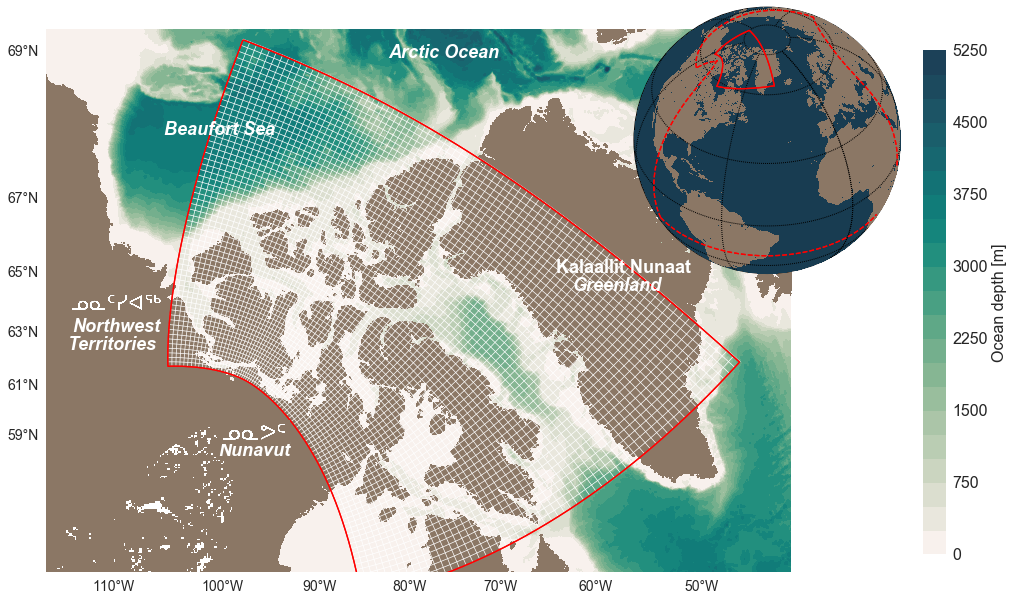

In [56]:
fig, ax1 = plt.subplots(figsize=(16,10))
left, bottom, width, height = [0.63, 0.54, 0.37, 0.37]
ax2 = fig.add_axes([left, bottom, width, height])

# plot 1 --------------------
proj = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj.drawmapboundary(fill_color='white')
proj.drawparallels(np.arange(-90.,120.,30.),zorder=5)
proj.drawmeridians(np.arange(0.,420.,60.),zorder=5)
proj.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=1) #105A68 #0F4F5B #0E4954

# # bathymetry: full-domain
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
    
x = x_mesh
y = y_mesh

# full domain:
proj.plot(x[:,0]         , y[:,0]        , 'r--', lw=1.3,zorder=5)
proj.plot(x[:,0].T       , y[:,0].T      , 'r--', lw=1.3,zorder=5)
proj.plot(x[200:-1,-1]   , y[200:-1,-1]  , 'r--', lw=1.3,zorder=5)
proj.plot(x[200:-1,-1].T , y[200:-1,-1].T, 'r--', lw=1.3,zorder=5)
proj.plot(x[-1,:]        , y[-1,:]       , 'r--', lw=1.3,zorder=5)
proj.plot(x[-1,:].T      , y[-1,:].T     , 'r--', lw=1.3,zorder=5)
proj.plot(x[0,0:-200]    , y[0,0:-200]   , 'r--', lw=1.3,zorder=5)
proj.plot(x[0,0:-200].T  , y[0,0:-200].T , 'r--', lw=1.3,zorder=5)

# sub-domain:
l1=1200
proj.plot(x[l1:2050,799],   y[l1:2050,799],   'r-', lw=1.3,zorder=5)
proj.plot(x[l1:2050,799].T, y[l1:2050,799].T, 'r-', lw=1.3,zorder=5)
proj.plot(x[l1:2050,200],   y[l1:2050,200],   'r-', lw=1.3,zorder=5)
proj.plot(x[l1:2050,200].T, y[l1:2050,200].T, 'r-', lw=1.3,zorder=5)
proj.plot(x[l1,200:799],    y[l1,200:799],    'r-', lw=1.3,zorder=5)
proj.plot(x[l1,200:799].T,  y[l1,200:799].T,  'r-', lw=1.3,zorder=5)
proj.plot(x[2050,200:799],    y[2050,200:799],    'r-', lw=1.3,zorder=5)
proj.plot(x[2050,200:799].T,  y[2050,200:799].T,  'r-', lw=1.3,zorder=5)

# plot 2: ---------------------------

proj2 = Basemap(projection='stere',lat_0 = 75, lon_0 = -79, resolution='i', width=4.8e6, height=3.5e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h')

# bathymetry:
clevels2=20
x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)
bath = proj2.contourf(x_mesh, y_mesh, mesh_bathy, clevels2, cmap=cmocean.cm.tempo, vmin=0, vmax=6000)

# apply land mask:
x2, y2 = proj2(mlons, mlats)
z2 = Z_masked[0,:,:]
cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj2.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmap1)

x=x_mesh
y=y_mesh
res=10

# sub-domain:
# Northern (model Eastern) boundary
proj2.plot(x[l1:2060:res,200:810:res], y[l1:2060:res,200:810:res], 'w-', lw=0.7)
proj2.plot(x[l1:2060:res,200:810:res].T, y[l1:2060:res,200:810:res].T, 'w-', lw=0.7)

# sub-domain:
proj2.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r-', lw=1.3)
proj2.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r-', lw=1.3)
proj2.plot(x[l1:2050,200]   , y[l1:2050,200]   , 'r-', lw=1.3)
proj2.plot(x[l1:2050,200].T , y[l1:2050,200].T , 'r-', lw=1.3)
proj2.plot(x[l1,200:799]    , y[l1,200:799]    , 'r-', lw=1.3)
proj2.plot(x[l1,200:799].T  , y[l1,200:799].T  , 'r-', lw=1.3)
proj2.plot(x[2050,200:799]    , y[2050,200:799]    , 'r-', lw=1.3)
proj2.plot(x[2050,200:799].T  , y[2050,200:799].T  , 'r-', lw=1.3)

# features:
textx, texty = proj2(lon_features1, lat_features1)
for i in range(len(features)):
    if features[i] == 'Kalaallit Nunaat':
        ax1.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', color='w')
    else:
        ax1.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w')
    
#nunavut:
ax3 = fig.add_axes([0.34, 0.30, 0.06, 0.04])
ax3.axis('off')
ax3.imshow(nv)
#northwest territories:
ax4 = fig.add_axes([0.20, 0.48, 0.10, 0.04])
ax4.axis('off')
ax4.imshow(nwt)

#---------------------
    
cbaxes = fig.add_axes([0.95, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax1, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)

fig.savefig('CAA_sub-domain_map-extended.png', bbox_inches='tight')